# IND6953N - TP2
### Étudiants:
1. Laurence Boudrias (1789997)
2. Charles Delisle (1801124)
3. Thomas Rochefort-Beaudoin (1842175)

#### Date soumise : 23 Avril 2019 
--- 

In [49]:
# On commence d'abord par importer les packages de base:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
database=pd.read_excel(open('Analyse_du_Credit.xlsx', 'rb'),sheet_name='Données sur le crédit')
import warnings; warnings.simplefilter('ignore')

In [50]:
#Identification des variables de catégories
categories=['Statut Compte épargne','Historique de crédit','Raison de la demande',
           'Épargnes',"Durée de l'emploi actuel",'Genre et statut marital',
           'Autres débiteurs','Type de propriété','Autres plan de versements échelonnés',
           'Résidence','Emploi','telephone','Travailleur étranger']

#Identification des variables continues
continued=['durée du prêt en mois','Montant crédit','Versements en % du revenu',
           "Nb d'années de la résidence",'age','Crédits à cette banque',
           'Personnes à charge']

#Séparation des variables de catégories en dummy variables
dummy=pd.get_dummies(database[categories])
print("Les dummies générées sont:\n")
list(dummy)

Les dummies générées sont:



['Statut Compte épargne_0 <= ... < 2000 $',
 'Statut Compte épargne_< 0 $',
 'Statut Compte épargne_>= 2000 $ / salary assignments for at least 1 year',
 'Statut Compte épargne_no checking account',
 'Historique de crédit_all credits at this bank paid back duly',
 'Historique de crédit_critical account/ other credits existing (not at this bank)',
 'Historique de crédit_delay in paying off in the past',
 'Historique de crédit_existing credits paid back duly till now',
 'Historique de crédit_no credits taken/ all credits paid back duly',
 'Raison de la demande_(vacation - does not exist?)',
 'Raison de la demande_business',
 'Raison de la demande_car (new)',
 'Raison de la demande_car (used)',
 'Raison de la demande_domestic appliances',
 'Raison de la demande_education',
 'Raison de la demande_furniture/equipment',
 'Raison de la demande_radio/television',
 'Raison de la demande_repairs',
 'Raison de la demande_retraining',
 'Épargnes_.. >= 10000 $ ',
 'Épargnes_... < 1000 $',
 'Épargne

### On veut maintenant modifier les dummies générées afin d'avoir au plus n-1 dummies pour nos n variables

- On combine les variables suivantes:
 - Raison de la demande_domestic appliances + Raison de la demande_furniture/equipment
 - Raison de la demande_car (used) + Raison de la demande_repairs
 - Raison de la demande_education + Raison de la demande_retraining + Raison de la demande_business + Raison de la demande_(vacation - does not exist?)
 

- On drop les variables suivantes:
 - 'Statut Compte épargne_no checking account'
 - 'Historique de crédit_no credits taken/ all credits paid back duly'
 - 'Épargnes_unknown/ no savings account'
 - "Durée de l'emploi actuel_unemployed"
 - 'Genre et statut marital_male : married/widowed'
 -  'Autres débiteurs_none'
 -  'Type de propriété_unknown / no property'
 -  'Autres plan de versements échelonnés_none'
 -  'Résidence_for free'
 -  'Emploi_unskilled - resident'
 -  'Emploi_unemployed/ unskilled - non-resident'
 -  'telephone_none',
 -  'Travailleur étranger_no',







In [51]:
# On additione les dummies combinées:
dummy['Raison de la demande_domestic appliances/furniture/equipment'] = dummy['Raison de la demande_domestic appliances']+ dummy['Raison de la demande_furniture/equipment']

dummy['Raison de la demande_car(used)/repairs']=dummy['Raison de la demande_car (used)']+dummy['Raison de la demande_repairs']

dummy['Raison de la demande_education/retraining/business/vacation']=dummy['Raison de la demande_education']+dummy['Raison de la demande_retraining']+dummy['Raison de la demande_business']+dummy['Raison de la demande_(vacation - does not exist?)']

#On drop les dummies :
drop=['Statut Compte épargne_no checking account',
      'Historique de crédit_no credits taken/ all credits paid back duly',
      'Épargnes_unknown/ no savings account',"Durée de l'emploi actuel_unemployed",
      'Genre et statut marital_male : married/widowed','Autres débiteurs_none',
      'Type de propriété_unknown / no property',
      'Autres plan de versements échelonnés_none',
      'Résidence_for free','Emploi_unskilled - resident',
      'telephone_none',
      'Travailleur étranger_no','Raison de la demande_domestic appliances',
      'Raison de la demande_furniture/equipment','Raison de la demande_car (used)',
      'Raison de la demande_repairs','Raison de la demande_education',
      'Raison de la demande_retraining','Raison de la demande_business',
      'Raison de la demande_(vacation - does not exist?)']


dummy=dummy.drop(columns=drop)

### On peut maintenant se débarasser des variables continues originales et on combine les dummies au database principal:

In [52]:
database=database.drop(columns=categories)
database=pd.concat([database,dummy],axis=1)

--- 
## 1.Analyse descriptive des données:

In [53]:
# On peut ici visualiser les statistiques de bases de chacunes des colonnes:
statistics=database.describe()
statistics

,Crédit,durée du prêt en mois,Montant crédit,Versements en % du revenu,Nb d'années de la résidence,age,Crédits à cette banque,Personnes à charge,Statut Compte épargne_0 <= ... < 2000 $,Statut Compte épargne_< 0 $,...,Résidence_own,Résidence_rent,Emploi_management/ self-employed/ highly qualified employee/ officer,Emploi_skilled employee / official,Emploi_unemployed/ unskilled - non-resident,"telephone_yes, registered under the customers name",Travailleur étranger_yes,Raison de la demande_domestic appliances/furniture/equipment,Raison de la demande_car(used)/repairs,Raison de la demande_education/retraining/business/vacation
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.269000,0.274000,...,0.713000,0.179000,0.148000,0.630000,0.022000,0.404000,0.963000,0.29200,0.115000,0.178000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.443662,0.446232,...,0.452588,0.383544,0.355278,0.483046,0.146757,0.490943,0.188856,0.45491,0.319182,0.382704
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.00000,0.000000,0.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


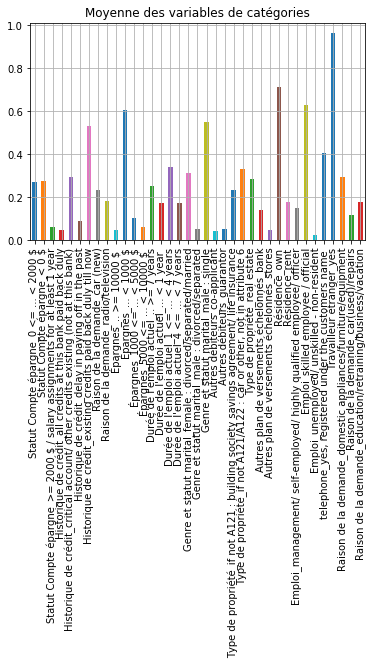

In [54]:
dummy.mean().plot(kind='bar')
plt.grid(True)
plt.title("Moyenne des variables de catégories")
plt.show()

### De cette figure nous pouvons observer que 96.3% des demandes de crédit sont effectuées par des travailleurs étrangers.

--- 
## 2. Séparation de l'échantillon 70% entraînement - 30% test

In [1]:
X=np.array(database.drop(columns='Crédit'))
Y=np.array(database['Crédit'])
feature_list = list(database.columns)
feature_list.pop(0)
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.30, random_state = 42)

NameError: name 'np' is not defined

---
## 3. Modèle Logit

In [56]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(trainX, trainY)
predictions = logisticRegr.predict(testX)
# Use score method to get accuracy of model
trainscore=logisticRegr.score(trainX, trainY)
print('Train score=',trainscore)
score = logisticRegr.score(testX, testY)
print('Test score=',score)
resid = testY - predictions
sse = sum(resid**2)
k=trainX.shape[1] 
AIC= 2*k - 2*np.log(sse)
print('AIC=',AIC)

Train score= 0.7814285714285715
Test score= 0.7633333333333333
AIC= 79.47464024591737


### Nous décidons de se débarasser d'abord des poids négatifs:

In [57]:
coefficient=logisticRegr.coef_
#On créer une nouvelle database qui sera construite sans les poids négatifs de la première régression
database2=database
for i in range(0,coefficient.shape[1]):
    print("Le paramètre:",feature_list[i],"a un poids de:",coefficient[0,i])
    if coefficient[0,i]<0:
        database2=database2.drop(columns=feature_list[i])

Le paramètre: durée du prêt en mois a un poids de: 0.018883733166105067
Le paramètre: Montant crédit a un poids de: 9.757305691329222e-05
Le paramètre: Versements en % du revenu a un poids de: 0.2646453143762074
Le paramètre: Nb d'années de la résidence a un poids de: -0.004881708603760236
Le paramètre: age a un poids de: -0.035679813432234926
Le paramètre: Crédits à cette banque a un poids de: 0.17811699214311194
Le paramètre: Personnes à charge a un poids de: 0.05588450904358157
Le paramètre: Statut Compte épargne_0 <= ... < 2000 $ a un poids de: 0.9685373365491334
Le paramètre: Statut Compte épargne_< 0 $ a un poids de: 1.2223490916254542
Le paramètre: Statut Compte épargne_>= 2000 $ / salary assignments for at least 1 year a un poids de: 0.3765906966368167
Le paramètre: Historique de crédit_all credits at this bank paid back duly a un poids de: 0.22329454873653914
Le paramètre: Historique de crédit_critical account/ other credits existing (not at this bank) a un poids de: -1.124233

In [58]:
X=np.array(database2.drop(columns='Crédit'))
Y=np.array(database2['Crédit'])

In [59]:
# Split the data into training and testing sets
trainX1, testX1, trainY1, testY1 = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [60]:
logisticRegr1 = LogisticRegression()
logisticRegr1.fit(trainX1, trainY1)
predictions1 = logisticRegr1.predict(testX1)
# Use score method to get accuracy of model
trainscore=logisticRegr1.score(trainX1, trainY1)
print('Train score=',trainscore)
score = logisticRegr1.score(testX1, testY1)
print('Test score=',score)
resid = testY1 - predictions1
sse = sum(resid**2)
k=trainX1.shape[1] 
AIC= 2*k - 2*np.log(sse)
print('AIC=',AIC)


Train score= 0.76
Test score= 0.7733333333333333
AIC= 29.560984589647788


### En enlevant les variables avec un poids négatif nous obtenons une augmentation de 1% sur le test score mais une baisse dramatique du AIC. Nous pouvons maintenant enlever les variables ayant un poids plus grand que 1 ou plus petit que 0.05

In [61]:
database3=database
for i in range(0,coefficient.shape[1]):
    if coefficient[0,i]<=0  or coefficient[0,i]<0.01 or coefficient[0,i]>1:
        database3=database3.drop(columns=feature_list[i])

In [62]:
X=np.array(database3.drop(columns='Crédit'))
Y=np.array(database3['Crédit'])
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.30, random_state = 42)
logisticRegr = LogisticRegression()
logisticRegr.fit(trainX, trainY)
predictions = logisticRegr.predict(testX)
# Use score method to get accuracy of model
trainscore=logisticRegr.score(trainX, trainY)
print('Train score=',trainscore)
score = logisticRegr.score(testX, testY)
print('Test score=',score)
resid = testY - predictions
sse = sum(resid**2)
k=trainX.shape[1] 
AIC= 2*k - 2*np.log(sse)
print('AIC=',AIC)

Train score= 0.73
Test score= 0.7566666666666667
AIC= 23.419081117703218


### On voit que nous avons obtenu une baisse de performance de 1.5% en enlevant les poids<0.01 et >1. Cette baisse fait du sens puisqu'on enlève la variable Statut Compte épargne_< 0. Il semble raisonnable de dire qu'avoir un compte chèque négatif est un grand indicateur de mauvais crédit.

--- 
## Recursive Feature Selection:
On utilise maintenant le package: sklearn.feature_selection.RFE de SkLearn

In [63]:
from sklearn.feature_selection import RFE
logisticRegr = LogisticRegression()
selector = RFE(logisticRegr, 20, step=1)

X=np.array(database.drop(columns='Crédit'))
Y=np.array(database['Crédit'])
selector = selector.fit(X, Y)
importance=selector.support_ 

In [64]:
database4=database
## On veut visualiser les variables qui ne sont pas sélectionnées
for i in range(0,len(importance)):
    if importance[i]==False :
        print("Le paramètre:",feature_list[i], "n'est pas selectionné")
        database4=database4.drop(columns=feature_list[i])

Le paramètre: durée du prêt en mois n'est pas selectionné
Le paramètre: Montant crédit n'est pas selectionné
Le paramètre: Versements en % du revenu n'est pas selectionné
Le paramètre: Nb d'années de la résidence n'est pas selectionné
Le paramètre: age n'est pas selectionné
Le paramètre: Crédits à cette banque n'est pas selectionné
Le paramètre: Personnes à charge n'est pas selectionné
Le paramètre: Statut Compte épargne_>= 2000 $ / salary assignments for at least 1 year n'est pas selectionné
Le paramètre: Historique de crédit_all credits at this bank paid back duly n'est pas selectionné
Le paramètre: Raison de la demande_car (new) n'est pas selectionné
Le paramètre: Épargnes_5000 <= ... < 10000 $  n'est pas selectionné
Le paramètre: Durée de l'emploi actuel_.. >= 7 years n'est pas selectionné
Le paramètre: Durée de l'emploi actuel_... < 1 year  n'est pas selectionné
Le paramètre: Durée de l'emploi actuel_1 <= ... < 4 years n'est pas selectionné
Le paramètre: Genre et statut marital_fe

In [65]:
X=np.array(database4.drop(columns='Crédit'))
Y=np.array(database4['Crédit'])
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.30, random_state = 42)
logisticRegr = LogisticRegression()
logisticRegr.fit(trainX, trainY)
predictions = logisticRegr.predict(testX)
# Use score method to get accuracy of model
trainscore=logisticRegr.score(trainX, trainY)
print('Train score=',trainscore)
score = logisticRegr.score(testX, testY)
print('Test score=',score)
resid = testY - predictions
sse = sum(resid**2)
k=trainX.shape[1] 
AIC= 2*k - 2*np.log(sse)
print('AIC=',AIC)

Train score= 0.7628571428571429
Test score= 0.76
AIC= 31.446667761967888


### On peut donc voir qu'en prenant 20 valeurs obtenues par le "Recursive Feature Elimination" nous obtenons un "Test Score" de 76.0%. Notre meilleur modèle est donc celui obtenu en enlevant les poids négatif de la première régression logistique.

In [66]:
#Confustion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(testY1, predictions1)
print(confusion_matrix)

[[195  14]
 [ 54  37]]


195+37=232 Bonnes prédictions et 
54+14=68 Mauvaises prédictions

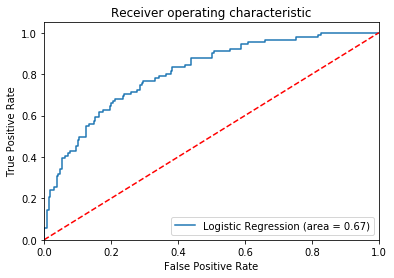

In [67]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logisticRegr.fit(trainX1, trainY1)
logit_roc_auc = roc_auc_score(testY1, logisticRegr.predict(testX1))
fpr, tpr, thresholds = roc_curve(testY1, logisticRegr.predict_proba(testX1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

On voit que notre classifieur est assez loin de la ligne pointillé qui représente une performance purement aléatoire ce qui est bien. L'objectif est d'être le plus à gauche de la ligne possible.

In [68]:
print("Le palmarès des variables du modèle Logit final est: \n")
coefficient=logisticRegr1.coef_
feature_list2=list(database2)
feature_list2.pop(0)
coefficient_reg=pd.DataFrame( np.transpose(coefficient))
featurelistframe=pd.DataFrame(np.transpose(feature_list2))
coefficient_reg=pd.concat([coefficient_reg,featurelistframe],axis=1)
coefficient_reg.columns = ['coef', 'variable']
coefficient_reg.sort_values(by='coef', ascending=0)


Le palmarès des variables du modèle Logit final est: 



,coef,variable
6,1.473009,Statut Compte épargne_< 0 $
5,1.059798,Statut Compte épargne_0 <= ... < 2000 $
9,0.820151,Raison de la demande_car (new)
18,0.584647,Raison de la demande_education/retraining/busi...
10,0.555330,Épargnes_... < 1000 $
8,0.513696,Historique de crédit_all credits at this bank ...
14,0.480075,Autres plan de versements échelonnés_bank
11,0.479865,Épargnes_1000 <= ... < 5000 $
12,0.413754,Genre et statut marital_female : divorced/sepa...
7,0.403175,Statut Compte épargne_>= 2000 $ / salary assig...


---
## Arbre de décision
Nous utilisons maintenant le DecisionTreeClassifier du package SkLearn.
Nous utiliserons premièrement toutes les variables du dataset.

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
X=np.array(database.drop(columns='Crédit'))
Y=np.array(database['Crédit'])
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.30, random_state = 42)

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100)                             
clf_gini.fit(trainX, trainY)
predictionstree=clf_gini.predict(testX)
print("Accuracy is ", accuracy_score(testY,predictionstree)*100)

Accuracy is  67.33333333333333


In [70]:
#Confustion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(testY, predictionstree)
print(confusion_matrix)

[[163  46]
 [ 52  39]]


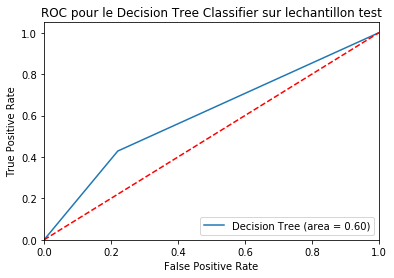

In [71]:
logit_roc_auc = roc_auc_score(testY, clf_gini.predict(testX))
fpr, tpr, thresholds = roc_curve(testY, clf_gini.predict_proba(testX)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC pour le Decision Tree Classifier sur lechantillon test')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

On voit que la courbe ROC sur l'échantillon test de l'arbre de décision est nettement moins bonne que celle du modèle Logit.

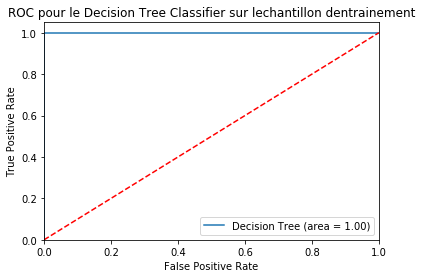

In [72]:
logit_roc_auc = roc_auc_score(trainY, clf_gini.predict(trainX))
fpr, tpr, thresholds = roc_curve(trainY, clf_gini.predict_proba(trainX)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC pour le Decision Tree Classifier sur lechantillon dentrainement')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

On peut voir que la courbe ROC est parfaite pour l'échantillon d'entraînement. On s'attend à ce résultat puisque l'algorithme s'entrâine sur plusieurs itérations afin de minimiser l'erreur.

### On répète maintenant l'exercice avec les variables sélectionnés par le modèle Logit:

In [73]:
X=np.array(database2.drop(columns='Crédit'))
Y=np.array(database2['Crédit'])
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.30, random_state = 42)
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100)                             
clf_gini.fit(trainX, trainY)
predictionstree=clf_gini.predict(testX)
print("Accuracy is ", accuracy_score(testY,predictionstree)*100)


Accuracy is  64.66666666666666


### On voit que la précision est plus de 10% moins bonne que celle du modèle Logit. Ceci veut probablement dire que l'indice de pureté n'est pas optimale pour les variables sélectionnées par le modèle Logit.

---
## 5. Random Forest

In [74]:
>>> from sklearn.ensemble import RandomForestClassifier
X=np.array(database.drop(columns='Crédit'))
Y=np.array(database['Crédit'])
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.30, random_state = 42)

clf = RandomForestClassifier(n_estimators=100,random_state=0)
clf.fit(trainX,trainY)
predictions_RF=clf.predict(testX)
score=clf.score(testX,testY)
print("Score du Random Forest:",score)

Score du Random Forest: 0.7566666666666667


In [75]:
#Confustion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(testY, predictions_RF)
print("La matrice de confusion pour le modèle Random Forest est: \n")
print(confusion_matrix)

La matrice de confusion pour le modèle Random Forest est: 

[[200   9]
 [ 64  27]]


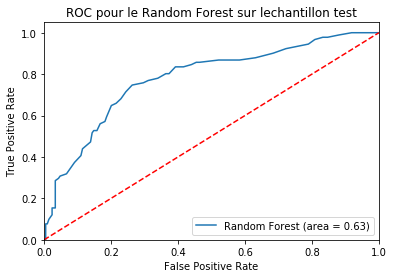

In [76]:
logit_roc_auc = roc_auc_score(testY, clf.predict(testX))
fpr, tpr, thresholds = roc_curve(testY, clf.predict_proba(testX)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC pour le Random Forest sur lechantillon test')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

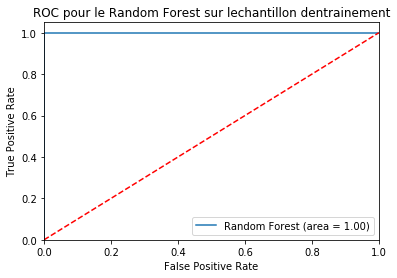

In [77]:
logit_roc_auc = roc_auc_score(trainY, clf.predict(trainX))
fpr, tpr, thresholds = roc_curve(trainY, clf.predict_proba(trainX)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC pour le Random Forest sur lechantillon dentrainement')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### On peut voir que le modèle Random Forest est légèrement meilleur que l'arbre de décsion sur l'échantillon test. L'importance des variables est présentée ci-dessous:

In [78]:
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
print("L'importance de chacunes des variables: \n")
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

L'importance de chacunes des variables: 

Variable: Montant crédit       Importance: 0.12
Variable: durée du prêt en mois Importance: 0.09
Variable: age                  Importance: 0.09
Variable: Statut Compte épargne_< 0 $ Importance: 0.05
Variable: Versements en % du revenu Importance: 0.04
Variable: Nb d'années de la résidence Importance: 0.04
Variable: Statut Compte épargne_0 <= ... < 2000 $ Importance: 0.03
Variable: Historique de crédit_critical account/ other credits existing (not at this bank) Importance: 0.03
Variable: Raison de la demande_car (new) Importance: 0.03
Variable: Crédits à cette banque Importance: 0.02
Variable: Historique de crédit_existing credits paid back duly till now Importance: 0.02
Variable: Épargnes_... < 1000 $ Importance: 0.02
Variable: Durée de l'emploi actuel_.. >= 7 years Importance: 0.02
Variable: Durée de l'emploi actuel_... < 1 year  Importance: 0.02
Variable: Durée de l'emploi actuel_1 <= ... < 4 years Importance: 0.02
Variable: Genre et statut 

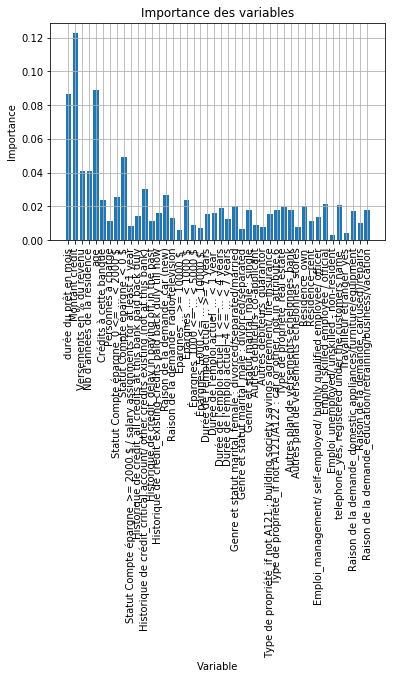

In [79]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
%matplotlib inline
# Set the style
#plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
plt.grid(True)
plt.box(True)
plt.rcParams["figure.facecolor"] = "w"
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Importance des variables');

## 5 Variables les plus importantes du modèle Logit

|                          Variables                          |   Poids  |
|:-----------------------------------------------------------:|:--------:|
|                 Statut Compte épargne_< 0                   | 1.473009 |
|          0 <=  Statut Compte epargne_    < 2000             | 1.059798 |
|                Raison de la demande_car (new)               | 0.820151 |
| Raison de la demande_education/retraining/business/vacation | 0.584647 |
|                    Épargnes_... < 1000 $                    | 0.555330 |

## 5 Variables les plus importantes du modèle Random Forest

|         Variables         | Coefficient d'importance |
|:-------------------------:|:------------------------:|
|       Montant Crédit      |           0.12           |
|            Âge            |           0.09           |
|    Durée du prêt (mois)   |           0.09           |
| Statut Compte épargne_< 0 |           0.05           |
|  Versement en % du revenu |           0.04           |

---
## 6. Séléction des variables explicatives
### On peut voir que le modèle Logit ne donne pas beaucoup d'importance aux variables continues alors que le Random Forest ne présente que des variables continues dans son top 5 de variables. Nous décidons d'utiliser les 9 variables présentes dans les top 5 du modèle Random Forest et Logit:
1. Statut Compte éparge <0
2. 0 <= Statut Compte epargne_ < 2000
3. Raison de la demande_car (new)
4. Raison de la demande_education/retraining/business/vacation
5. Épargnes_... < 1000
6. Montant Crédit
7. Âge
8. Durée du prêt (mois)
9. Versement en % du revenu

In [80]:
data=['Crédit','Statut Compte épargne_< 0 $','Statut Compte épargne_0 <= ... < 2000 $', 'Raison de la demande_car (new)',
 'Raison de la demande_education/retraining/business/vacation', 'Épargnes_... < 1000 $', 'Montant crédit', 'age',
              'durée du prêt en mois', 'Versements en % du revenu']

database_new=database[data]
X=np.array(database_new.drop(columns='Crédit'))
Y=np.array(database_new['Crédit'])
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.30, random_state = 42)

---
## 7 a):  SVM linéaire

In [81]:
from sklearn.svm import LinearSVC
from sklearn import svm
SVM = svm.SVC(kernel='linear') # Linear Kernel
SVM.fit(trainX, trainY)
SVM.predict(testX)
score=SVM.score(testX,testY)
print(score)

0.7533333333333333


## 7 b):  SVM radial

In [82]:
SVM_radial = svm.SVC(kernel='rbf') # Linear Kernel
SVM_radial.fit(trainX, trainY)
SVM_radial.predict(testX)
score=SVM_radial.score(testX,testY)
print(score)

0.6966666666666667


## 7 c):  Modèle de Neurones (perceptron multi-couches)

In [83]:
# On utilise un perceptron multi-couches:

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(5,5,5,5,5,5),max_iter=500,random_state=21)
mlp.fit(trainX,trainY)
predY=mlp.predict(testX)
score=accuracy_score(testY, predY)
print("Le score du modèle de neurones est:",score)

Le score du modèle de neurones est: 0.74


## 7 d):  Deep Learning 

In [84]:
from keras import Sequential
from keras.layers import Dense

In [85]:
X=np.array(database.drop(columns='Crédit'))
Y=np.array(database['Crédit'])
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.30, random_state = 42)
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=44))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Second  Hidden Layer
#classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Second  Hidden Layer
#classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Second  Hidden Layer
#classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [86]:
#Fitting the data to the training dataset
classifier.fit(trainX,trainY, batch_size=10, epochs=100,verbose=0)

In [87]:
from sklearn.metrics import confusion_matrix
y_pred=classifier.predict(testX)
y_pred =(y_pred>0.5)
cm = confusion_matrix(testY, y_pred)
print(cm)

[[192  17]
 [ 69  22]]


Nous avons donc 214 bonnes prédictions sur 300, donnant une précision de 71.13%

---
##  Comparaison finale des classificateurs

|       Classifiers:       | Précision: |
|:------------------------:|:----------:|
|           Logit          |   77.33%   |
|     Arbre de décision    |   67.33%   |
|       Random Forest      |   75.66%   |
|       SVM Linéaire       |   75.33%   |
|        SVM Radial        |   69.66%   |
| Perceptron Multi-couches |   74.00%   |
|      Modèle profond      |   71.13%   |

Cette comparaison nous permet de sélectionner le modèle Logit comme étant le meilleur "classifier", avec une précision de 77.33% sur l'échantillon test. Il est à noter que cette précision est obtenue après avoir négliger les variables ayant obtenues un poids négatifs du modèle Logit effectué avec tout les variables de la banque de données.